In [2]:
Gp=Graph(weighted=True)
aristas=[('A','C',36),('B','I',12),('B','J',34),('C','E',45),('C','G',48),('D','G',18),('D','H',36),('E','J',30), ('F','H',40),('G','J',38),('H','J',43)]
Gp.add_edges(aristas)

In [52]:
def Djkstra(G,s,e):
    '''
    Caminos mas cortos en un grafo desde uno de sus vértices, usando el algoritmo de Djkstra.
    Si el grafo no es ponderado, se convierte a ponderado con peso 1 en las aristas.
    
    SINTAXIS:  (D,T, camino, iteraciones)=Djkstra(Gp, s, e)
    
    INPUT:
    - G -- un grafo no dirigido (ponderado o no)
    - s -- un vértice de G desde el que se calculan las distancias
    - e -- un vértice de G que será el vértice fin

    
    OUTPUT:
    - D -- Distancia del camino.
    - T -- árbol de camino mínimo desde s a e
    - camino -- lista de los vértices del camino
    - iteaciones -- número de iteraciones realizadas para sacar el camino
    '''
    
    #Si G no es ponderado poner peso 1 a las aristas
    if not G.weighted():
        G.weighted(True)
        for a in G.edges():
            G.set_edge_label(a[0],a[1],1)
    
    #Controlar si G es conexo
    if not G.is_connected():
        print("El grafo no es conexo.")
        print("Se la solución para la componente conexa del vértice de inicio ",s ," si no contiene tambien a ", e, "no hay resultado")
    
    cc=G.connected_component_containing_vertex(s)
    vtodos=G.vertices()
  
    
    n=G.order()
    #Padres=[[] for _ in range(n)] #Inicializar padres de los vértices
    Padres=[[] for _ in [0..n-1]] #Inicializar padres de los vértices
    #D=[1000000000 for _ in range(n)] #Etiquetas igual a "infinito"
    D=[1000000000 for _ in [0..n-1]] #Etiquetas igual a "infinito"

    inds=vtodos.index(s)
    D[inds]=0
    Q=set(cc)
    v=None
    iteraciones=0
    while len(Q)>0 or v==e:
        #Buscamos el vértice de Q con menor etiqueta
        low=1000000000
        for u in Q:
            indu=vtodos.index(u)
            if D[indu]<low:
                v=u
                low=D[indu]
        #Actualizamos etiquetas
        indv=vtodos.index(v)
        Q.remove(v)
        Adj=set(G.neighbors(v))
        for u in Adj.intersection(Q):
            larista=G.edge_label(v,u)
            indu=vtodos.index(u)
            if D[indu]>D[indv]+larista:
                D[indu]=D[indv]+larista
                Padres[indu]=[v]
        iteraciones+=1
   
    camino=[e]
    hijo = vtodos.index(e)
    padreDe=Padres[hijo]
    while padreDe:
        camino.append(padreDe[0])
        hijo = vtodos.index(padreDe[0])
        padreDe=Padres[hijo]
    
    P={}  #Dicionario con los padres de cada vértice
    for u in cc:
        if u in camino:
            indu=vtodos.index(u)
            P.setdefault(u,Padres[indu])             
    T=Graph(P) #Árbol de camino mínimo
    T.weighted(True)
    for a in T.edges():
        T.set_edge_label(a[0],a[1],G.edge_label(a[0],a[1]))
    camino.reverse()
    return D[vtodos.index(e)],T, camino, iteraciones

['A', 'C', 'E']


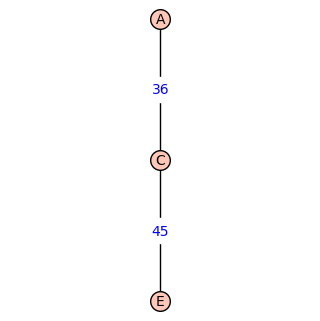

In [53]:
(D,T, camino, iteraciones)=Djkstra(Gp,'A', 'E')
print(camino)
T.plot(figsize=5,layout='tree',tree_root='A',edge_labels=True)

['A', 'C', 'E', 'J', 'B', 'I']


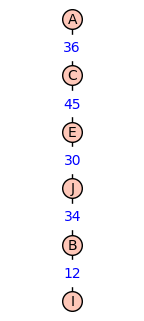

In [54]:
(D,T, camino, iteraciones)=Djkstra(Gp,'A', 'I')
print(camino)
T.plot(figsize=5,layout='tree',tree_root='A',edge_labels=True)